In [1]:
import mediapipe as mp
import cv2
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import derivative
from scipy.signal import find_peaks
from statistics import stdev,mean
import itertools as itr
import pprint, pickle

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [3]:
cap = cv2.VideoCapture("jayasanka_left.mp4")

#check the fps
#fps = cap.get(cv2.CAP_PROP_FPS) 
#print(fps)

myarray = np.empty(shape=(1,33,4))

start = time.time()

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    idx=0
    while cap.isOpened():
        
        ret, frame = cap.read()
        if ret:

            #set specific frames sequence by vedio
            #cap.set(cv2.CAP_PROP_POS_FRAMES, idx* 4)

            # Recolor Feed
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # Make Detections
            results = holistic.process(image)
            # print(results.face_landmarks)

            # Recolor image back to BGR for rendering
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
            #print(results.pose_landmarks)
            #print("--------------------------------------")

            if results.pose_landmarks != None:
                key_list= []
                t=time.time()
                for data_point in results.pose_landmarks.landmark:
                    key_list.append([data_point.x,data_point.y,data_point.z,t])    
                mat = np.array(key_list)
                myarray = np.vstack([myarray,[mat]])

            idxx=time.time()
            #idx+=1
            #path="/media/jayasanka/New Volume/cs/AI/gait recognition/Full-Body-Estimation-using-Media-Pipe-Holistic/frames3"
            #cv2.imwrite(os.path.join(path , '{}.png'.format(idxx)),image)

            cv2.imshow('Raw Webcam Feed', image)
            #................................................................

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                #idx=0
        else:
            break
            
            
end = time.time()
print(end - start)
cap.release()
cv2.destroyAllWindows()



1.0384275913238525


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [4]:
plt.matshow(image)

NameError: name 'image' is not defined

In [5]:
#np.set_printoptions(threshold=np.inf)
#print(myarray)

In [9]:
key_array = np.delete(myarray, 0, 0)
np.set_printoptions(threshold=np.inf)
print(key_array.shape)
print(len(key_array))

(3594, 33, 4)
3594


In [10]:
output = open('key_data/key_array_jayasanka_Lside.pkl', 'wb')
pickle.dump(key_array, output)
output.close()

# definitions

In [6]:
def get_peaks(df,y):
    peaks, _ = find_peaks(-y,prominence=0.03)
    plt.figure(figsize=(20,5))
    plt.plot(df.t,y)
    plt.plot(df.t[peaks], y[peaks],"X",markerfacecolor='red',markersize=8)
    plt.show()
    return peaks

In [7]:
def time_diff(peaks):
    array=[]
    for i in range(len(peaks)-1):
        td=df.t[peaks[i+1]]-df.t[peaks[i]]
        array.append(td)
    return array

In [8]:
def distribution(data):
    ax=sns.distplot(data,
                kde=True,
                bins=8,
                color='blue',
                hist_kws={"linewidth": 22,'alpha':0.60})
    ax.set(xlabel='Binomial',ylabel='Frequency')
    plt.show()

In [9]:
def remove_time_gap(data):
    from statistics import stdev,mean
    SD=stdev(data)
    m= mean(data)
 
    cut_off = SD * 0.5
    upper =  m + cut_off
    array = [x for x in data if x < upper]
    return array
    

In [10]:
def remove_distinc(array,df,Time_to_index_ratio,y):
    modified_mean= mean(array)
    Distance=Time_to_index_ratio*modified_mean*0.5
    
    peaks, _ = find_peaks(-y,prominence=0.03,distance=Distance)
    plt.figure(figsize=(20,5))
    plt.plot(df.t,y)
    plt.plot(df.t[peaks], y[peaks],"X",markerfacecolor='red',markersize=8)
    plt.show()
    return peaks
    

In [11]:
def sample(df,strike_peak,time_return_points):
    a = np.array(df.t[strike_peak])
    sample_strikes=[]
    for i in range(len(time_return_points)-1):
        index=np.where(np.logical_and(a>=time_return_points.t[i], a<=time_return_points.t[i+1]))
        s = list(map(lambda a : df.t[strike_peak[a]], index[0]))
        sample_strikes.append(s)
    return sample_strikes

In [12]:
def strides(sample_strikes):
    strides=[]
    for strike in sample_strikes:
        sample=[]
        for i in range(len(strike)-1):
            t_diff=strike[i+1]-strike[i]
            sample.append(t_diff)
        strides.append(sample)
    return strides
    

In [14]:
name='chathura'

In [15]:

f_file = open('key_data/key_array_{}_left.pkl'.format(name), 'rb')

key_array = pickle.load(f_file)
#pprint.pprint(fT)

f_file.close()


In [16]:
def com(A,B):
    if type(A)==np.ndarray:
        C= A.tolist()
    else:
        C=A
    for i,v in enumerate(B):
        C.insert(2*i+1,v) 
    return C

# anckle-hip length side

In [17]:
array=[]
for i in range(len(key_array)):
    t=key_array[i][28][3]
    right=abs(key_array[i][24][1]-key_array[i][28][1])
    left=abs(key_array[i][23][1]-key_array[i][27][1])
    heel_r=abs(key_array[i][24][1]-key_array[i][30][1])
    foot_index_r=abs(key_array[i][24][1]-key_array[i][32][1])
    heel_l=abs(key_array[i][23][1]-key_array[i][29][1])
    foot_index_l=abs(key_array[i][23][1]-key_array[i][31][1])
    x=key_array[i][28][0]
    center=(key_array[i][11][0]+key_array[i][12][0]+key_array[i][23][0]+key_array[i][24][0])/4
    array.append([right])
    array[i].append(left)
    array[i].append(heel_r)
    array[i].append(foot_index_r)
    array[i].append(heel_l)
    array[i].append(foot_index_l)
    array[i].append(t)
    array[i].append(x)
    array[i].append(center)
array = np.array(array)
print(array)

[[1.98838294e-01 2.11214304e-01 2.21221387e-01 ... 4.60951567e-01
  8.77281308e-01 8.74582544e-01]
 [2.01837063e-01 2.13230461e-01 2.23986149e-01 ... 5.66354990e-01
  8.81576419e-01 8.74645829e-01]
 [2.06215799e-01 2.14247108e-01 2.26136029e-01 ... 6.55098677e-01
  8.81308794e-01 8.74470800e-01]
 ...
 [1.97551489e-01 1.85221195e-01 2.16953993e-01 ... 1.96610026e+03
  7.77605474e-01 7.81901866e-01]
 [1.96377456e-01 1.85121059e-01 2.17021823e-01 ... 1.96619610e+03
  7.77609706e-01 7.82452136e-01]
 [1.95771039e-01 1.84691250e-01 2.16750205e-01 ... 1.96629141e+03
  7.77559102e-01 7.82312751e-01]]


In [18]:
df = pd.DataFrame(array,columns=['r','l','h_R','f_R','h_L','f_L','t','x','center'])
print(df)

              r         l       h_R       f_R       h_L       f_L  \
0      0.198838  0.211214  0.221221  0.228841  0.232117  0.240728   
1      0.201837  0.213230  0.223986  0.231692  0.232383  0.243438   
2      0.206216  0.214247  0.226136  0.234370  0.232620  0.244455   
3      0.206993  0.215267  0.226453  0.235049  0.232789  0.244552   
4      0.206846  0.215205  0.226246  0.234991  0.232715  0.244409   
...         ...       ...       ...       ...       ...       ...   
17728  0.197887  0.184223  0.217709  0.218097  0.187538  0.226718   
17729  0.197910  0.185310  0.217329  0.218333  0.188733  0.226116   
17730  0.197551  0.185221  0.216954  0.218336  0.188841  0.224724   
17731  0.196377  0.185121  0.217022  0.218274  0.189022  0.224445   
17732  0.195771  0.184691  0.216750  0.218214  0.188671  0.223719   

                 t         x    center  
0         0.460952  0.877281  0.874583  
1         0.566355  0.881576  0.874646  
2         0.655099  0.881309  0.874471  
3      

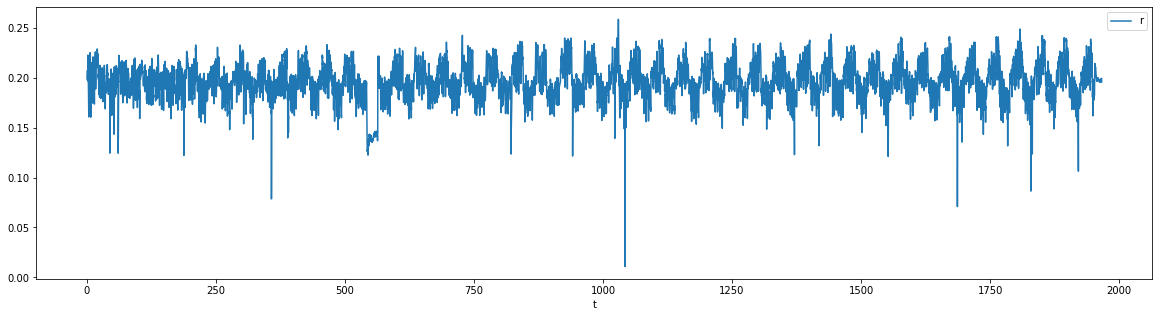

In [19]:
df.plot(x ='t', y='r', kind = 'line',figsize=(20,5))
plt.show()

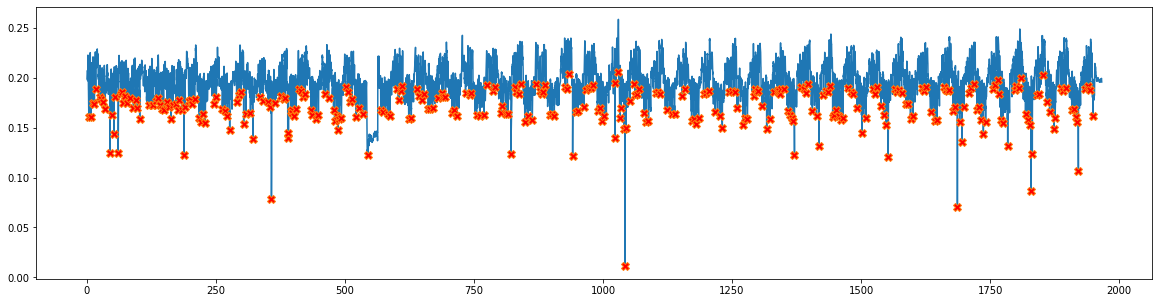

In [20]:
peaks=get_peaks(df,df.r)

In [21]:

Time_to_index_ratio=(peaks[1]-peaks[0])/(df.t[peaks[1]]-df.t[peaks[0]])
print(Time_to_index_ratio)

9.139795804901823


# walking direction

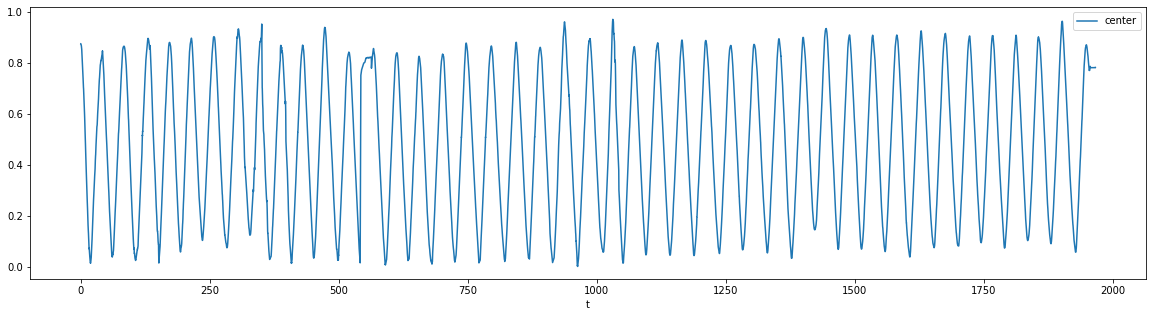

In [22]:
df.plot(x ='t', y='center', kind = 'line',figsize=(20,5))
plt.show()

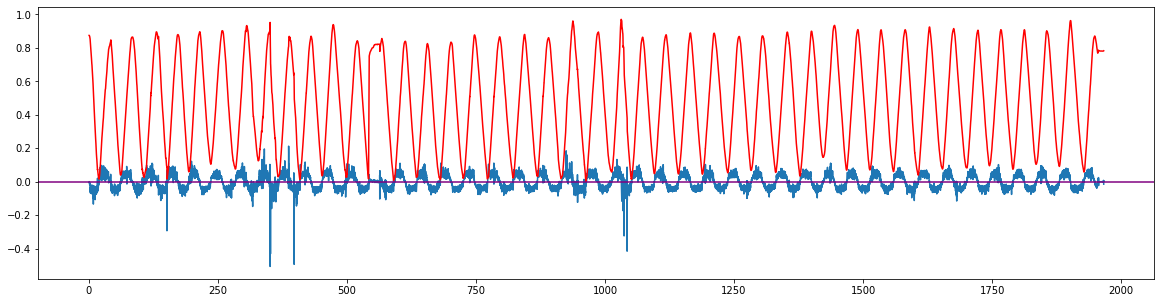

In [23]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(df.t, df.center, k=4, s=0)
diffspl = spl.derivative()

plt.figure(figsize=(20,5))
plt.plot(df.t,diffspl(df.t))
plt.plot(df.t,df.center,'r')
plt.axhline(y=0, color='purple', linestyle='-')
plt.show()



[186, 390, 569, 775, 991, 1203, 1393, 1596, 1794, 2002, 2202, 2414, 2647, 2858, 3058, 3269, 3415, 3591, 3782, 3978, 4182, 4383, 4600, 4795, 4993, 5219, 5427, 5623, 5817, 6001, 6229, 6422, 6637, 6823, 7046, 7246, 7481, 7678, 7894, 8083, 8302, 8474, 8711, 8918, 9150, 9306, 9475, 9673, 9875, 10082, 10295, 10504, 10710, 10918, 11154, 11357, 11562, 11769, 12000, 12200, 12432, 12636, 12840, 13048, 13250, 13449, 13657, 13849, 14068, 14270, 14495, 14696, 14921, 15120, 15342, 15540, 15744, 15935, 16143, 16341, 16540, 16734, 16952, 17146, 17379, 17569]
    index            t
0     186    19.546885
1     390    42.361872
2     569    61.457483
3     775    83.624376
4     991   106.618666
..    ...          ...
81  16734  1856.144358
82  16952  1880.297951
83  17146  1902.058562
84  17379  1928.287069
85  17569  1948.964389

[86 rows x 2 columns]


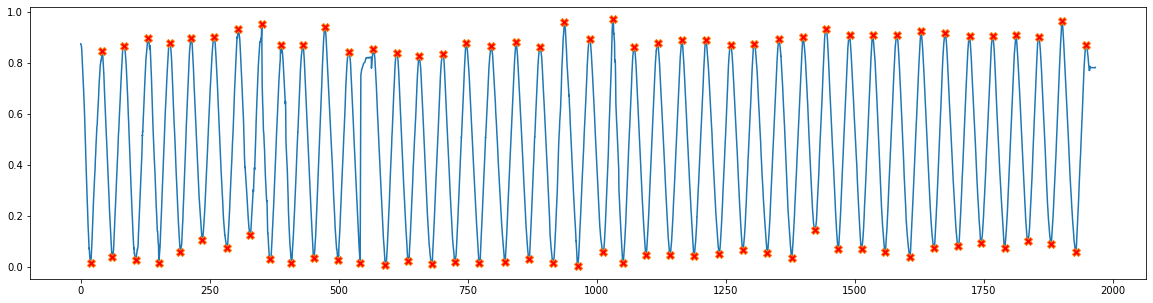

In [24]:
return_points_plus , _ = find_peaks(-df.center,prominence=0.05)
return_points_minus , _ = find_peaks(df.center,prominence=0.05)
if return_points_plus[0]<return_points_minus[0]:
    return_points=com(return_points_plus,return_points_minus)
else:
    return_points=com(return_points_minus,return_points_plus)
print(return_points)
time_return_points=pd.DataFrame(df.t[return_points],columns=['t']).reset_index()
print(time_return_points)
plt.figure(figsize=(20,5))
plt.plot(df.t,df.center)
plt.plot(df.t[return_points], df.center[return_points],"X",markerfacecolor='red',markersize=8)
plt.show()

In [25]:
a = diffspl(df.t)
zero_crossings = np.where(np.diff(np.sign(a)))[0]
print(zero_crossings)

[    0     1   158   160   180   181   183   184   185   354   355   366
   367   389   390   391   399   400   564   565   569   571   572   579
   580   677   678   765   766   775   777   778   780   782   783   784
   787   788   959   960   962   963   969   971   983   984   991   995
   996  1005  1006  1014  1015  1017  1018  1019  1020  1101  1102  1105
  1106  1131  1132  1202  1206  1207  1233  1240  1369  1370  1375  1376
  1387  1388  1389  1390  1392  1398  1399  1505  1506  1591  1592  1593
  1594  1596  1794  1795  1796  1804  1805  1807  1808  1809  1810  1830
  1831  1836  1837  2001  2201  2407  2408  2411  2412  2414  2419  2420
  2565  2566  2568  2569  2577  2578  2610  2611  2647  2649  2650  2810
  2811  2834  2837  2838  2839  2854  2855  2857  2860  2861  2873  2874
  2935  2936  3039  3040  3042  3043  3057  3060  3061  3085  3086  3116
  3120  3137  3140  3222  3223  3243  3245  3250  3251  3256  3258  3260
  3262  3268  3361  3364  3382  3383  3410  3411  3

In [26]:
df.center[zero_crossings[0]],df.center[zero_crossings[1]]

(0.8745825439691544, 0.8746458292007446)

In [27]:
if df.center[zero_crossings[0]]>df.center[zero_crossings[1]]:
    plus=0
    minus=1
elif df.center[zero_crossings[0]]<df.center[zero_crossings[1]]:
    plus=1
    minus=0
else:
    print("error in direction detection")

In [28]:
print(plus,minus)

1 0


In [29]:
plus=1
minus=0

In [30]:
df['velocity'] = diffspl(df.t)
print(df)

              r         l       h_R       f_R       h_L       f_L  \
0      0.198838  0.211214  0.221221  0.228841  0.232117  0.240728   
1      0.201837  0.213230  0.223986  0.231692  0.232383  0.243438   
2      0.206216  0.214247  0.226136  0.234370  0.232620  0.244455   
3      0.206993  0.215267  0.226453  0.235049  0.232789  0.244552   
4      0.206846  0.215205  0.226246  0.234991  0.232715  0.244409   
...         ...       ...       ...       ...       ...       ...   
17728  0.197887  0.184223  0.217709  0.218097  0.187538  0.226718   
17729  0.197910  0.185310  0.217329  0.218333  0.188733  0.226116   
17730  0.197551  0.185221  0.216954  0.218336  0.188841  0.224724   
17731  0.196377  0.185121  0.217022  0.218274  0.189022  0.224445   
17732  0.195771  0.184691  0.216750  0.218214  0.188671  0.223719   

                 t         x    center  velocity  
0         0.460952  0.877281  0.874583 -0.002617  
1         0.566355  0.881576  0.874646  0.000723  
2         0.655099

In [31]:
df_plus=df[df.velocity < 0] 
df_minus=df[df.velocity > 0]
df_plus =df_plus.reset_index()
df_minus=df_minus.reset_index()
print(df_plus)
print(df_minus)

      index         r         l       h_R       f_R       h_L       f_L  \
0         0  0.198838  0.211214  0.221221  0.228841  0.232117  0.240728   
1         2  0.206216  0.214247  0.226136  0.234370  0.232620  0.244455   
2         3  0.206993  0.215267  0.226453  0.235049  0.232789  0.244552   
3         4  0.206846  0.215205  0.226246  0.234991  0.232715  0.244409   
4         5  0.207328  0.215364  0.226604  0.235413  0.232709  0.244291   
...     ...       ...       ...       ...       ...       ...       ...   
9169  17722  0.198689  0.186513  0.216277  0.219632  0.189891  0.228965   
9170  17724  0.198853  0.186010  0.218746  0.218760  0.189410  0.229570   
9171  17725  0.198848  0.185754  0.219374  0.218354  0.189214  0.229682   
9172  17726  0.198924  0.185441  0.219587  0.218415  0.188760  0.228930   
9173  17732  0.195771  0.184691  0.216750  0.218214  0.188671  0.223719   

                t         x    center  velocity  
0        0.460952  0.877281  0.874583 -0.002617  

# Right leg

# walking left to right-plus direction

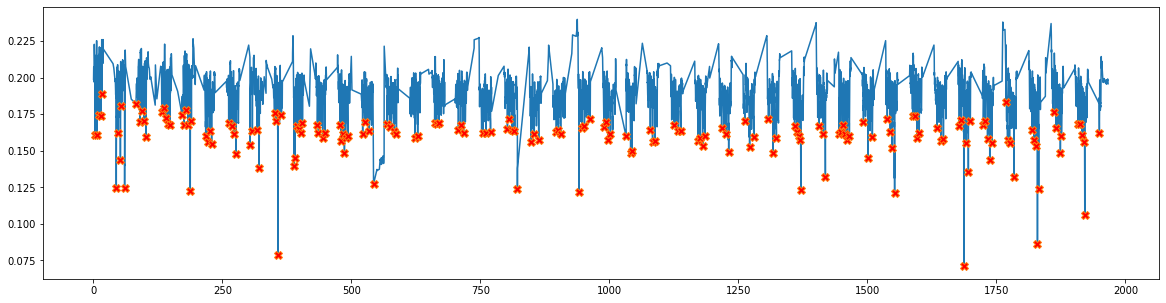

In [32]:
peaks=get_peaks(df_plus,df_plus.r)

[3.8135175704956055, 3.5931410789489746, 3.3787660598754883, 2.2379066944122314, 4.721003293991089, 3.6713614463806152, 4.3219780921936035, 2.3088607788085938, 6.370085954666138, 1.424170732498169, 5.7435362339019775, 3.9005331993103027, 3.962045192718506, 4.760183811187744, 7.083919048309326, 3.1013600826263428, 3.903015613555908, 4.0921547412872314, 3.3709800243377686, 2.493042469024658, 3.7619080543518066, 3.446397304534912, 4.238168239593506, 4.206770658493042, 2.187326192855835, 7.141669511795044, 5.024294137954712, 4.260267972946167, 3.6685104370117188, 10.33893370628357, 6.352221727371216, 4.258756160736084, 4.00303053855896, 7.5817036628723145, 2.248070478439331, 7.881178140640259, 4.493374586105347, 7.46233606338501, 2.578110933303833, 3.8229262828826904, 6.826689720153809, 3.318159580230713, 1.0909004211425781, 4.356842517852783, 2.4126675128936768, 3.8410089015960693, 3.072272777557373, 6.677305459976196, 1.7798144817352295, 8.239756345748901, 3.8142616748809814, 8.242570877

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


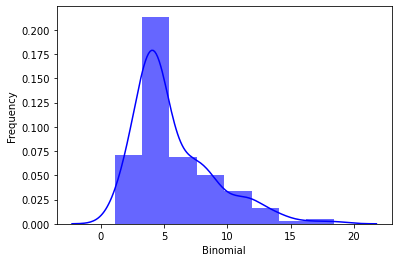

In [33]:
dt_plus_right=time_diff(peaks)
print(dt_plus_right)
distribution(dt_plus_right)

[3.8135175704956055, 3.5931410789489746, 3.3787660598754883, 2.2379066944122314, 4.721003293991089, 3.6713614463806152, 4.3219780921936035, 2.3088607788085938, 6.370085954666138, 1.424170732498169, 5.7435362339019775, 3.9005331993103027, 3.962045192718506, 4.760183811187744, 7.083919048309326, 3.1013600826263428, 3.903015613555908, 4.0921547412872314, 3.3709800243377686, 2.493042469024658, 3.7619080543518066, 3.446397304534912, 4.238168239593506, 4.206770658493042, 2.187326192855835, 7.141669511795044, 5.024294137954712, 4.260267972946167, 3.6685104370117188, 6.352221727371216, 4.258756160736084, 4.00303053855896, 2.248070478439331, 4.493374586105347, 2.578110933303833, 3.8229262828826904, 6.826689720153809, 3.318159580230713, 1.0909004211425781, 4.356842517852783, 2.4126675128936768, 3.8410089015960693, 3.072272777557373, 6.677305459976196, 1.7798144817352295, 3.8142616748809814, 1.780212640762329, 4.006160736083984, 2.452863931655884, 1.9568350315093994, 4.136581182479858, 5.96031260

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


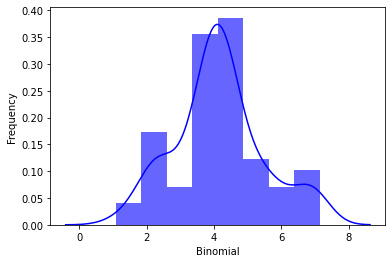

In [34]:
dt_plus_right_new=remove_time_gap(dt_plus_right)
print(dt_plus_right_new)
distribution(dt_plus_right_new)

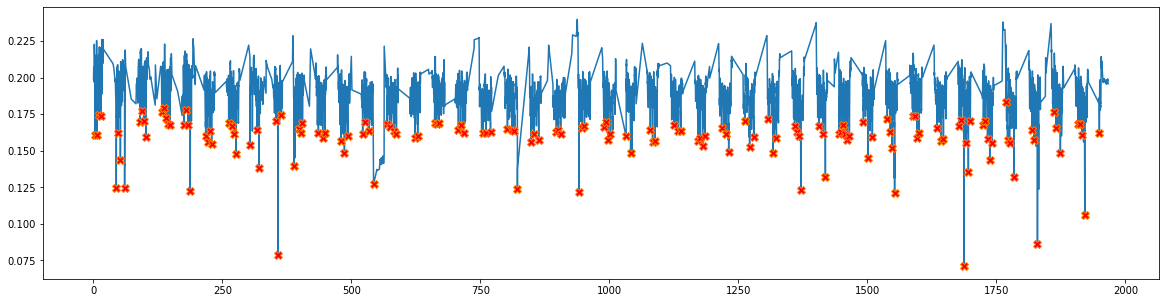

In [35]:
plus_peaks_R=remove_distinc(dt_plus_right,df_plus,Time_to_index_ratio,df_plus.r)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


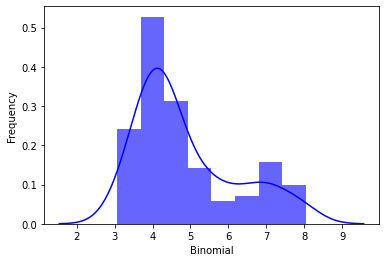

In [36]:
dt_plus_right=time_diff(plus_peaks_R)
dt_plus_right_cleaned=remove_time_gap(dt_plus_right)
distribution(dt_plus_right_cleaned)

# Walking right to Left - minus direction

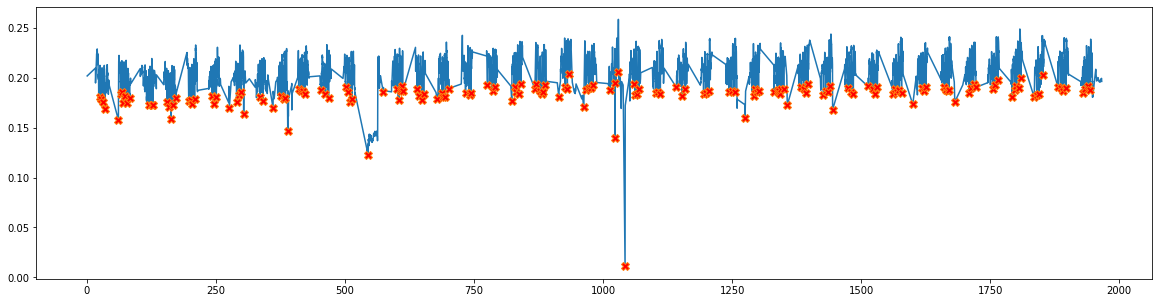

In [37]:
peaks=get_peaks(df_minus,df_minus.r)

[2.208678722381592, 3.4929628372192383, 4.185827732086182, 6.140689849853516, 3.474320411682129, 1.8821966648101807, 2.3053674697875977, 3.8561489582061768, 4.606200218200684, 5.960607290267944, 12.866021156311035, 5.394117116928101, 2.56265926361084, 8.221062660217285, 3.743995428085327, 3.445647716522217, 3.8698902130126953, 6.087106466293335, 3.5822784900665283, 3.112910747528076, 3.6759872436523438, 4.280016183853149, 14.689613819122314, 3.974548816680908, 3.9615871906280518, 8.562566757202148, 6.3696324825286865, 4.255573511123657, 4.161798477172852, 5.640697956085205, 8.766088247299194, 4.459237813949585, 9.20338773727417, 6.974330186843872, 5.678698301315308, 2.4879980087280273, 3.5248663425445557, 1.8374688625335693, 4.158364295959473, 3.6396067142486572, 3.5194568634033203, 8.882610082626343, 8.682753086090088, 6.138977289199829, 8.038113117218018, 3.9529075622558594, 4.0229151248931885, 3.9584360122680664, 7.801105499267578, 17.237497806549072, 9.249513864517212, 4.1369633674

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


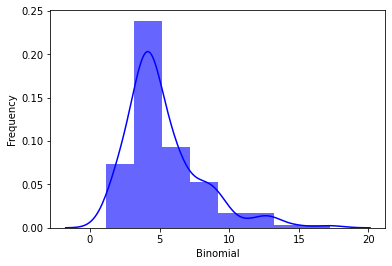

In [38]:
dt_minus_right=time_diff(peaks)
print(dt_minus_right)
distribution(dt_minus_right)

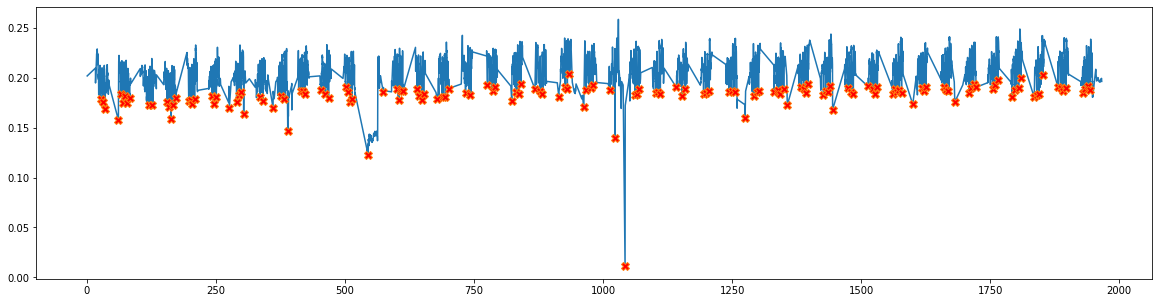

In [39]:
minus_peaks_R=remove_distinc(dt_minus_right,df_minus,Time_to_index_ratio,df_minus.r)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


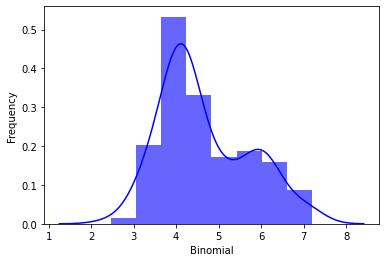

In [40]:
dt_minus_right=time_diff(minus_peaks_R)
dt_minus_right_cleaned=remove_time_gap(dt_minus_right)
distribution(dt_minus_right_cleaned)

# sampling- right leg

In [41]:
sample_strikes_plus_R=sample(df_plus,plus_peaks_R,time_return_points)
sample_strikes_minus_R=sample(df_minus,minus_peaks_R,time_return_points)

In [42]:
strides_plus_R=strides(sample_strikes_plus_R)
strides_minus_R=strides(sample_strikes_minus_R)
print(strides_plus_R)
print('\n')
print(strides_minus_R)

[[], [3.675100326538086, 4.305063009262085, 8.116344451904297], [], [4.019919157028198, 3.550543785095215, 4.466573715209961], [], [3.8904130458831787, 3.8201746940612793, 4.0037455558776855, 3.6830382347106934], [], [3.3640830516815186, 4.1720192432403564, 4.389620542526245], [], [3.5151519775390625, 4.0138115882873535, 3.9046313762664795], [], [6.063919544219971, 3.9769582748413086, 4.25362491607666], [], [4.612257242202759], [], [3.514453649520874, 7.02759051322937], [], [8.76333498954773, 4.068791151046753, 3.3348581790924072], [], [8.349578619003296, 4.0871803760528564], [], [6.7297422885894775, 6.599209785461426], [], [4.454484224319458, 8.370997190475464], [], [4.572228193283081, 8.769559860229492, 4.544166088104248], [], [4.697382688522339], [], [3.942190170288086, 4.341308116912842], [], [4.0758209228515625, 5.867320537567139], [], [6.199417591094971, 8.547823190689087], [], [8.71604585647583, 4.777944803237915, 5.846991777420044], [], [5.670196533203125, 8.955146074295044], [

In [43]:
avg_stride_plus_R=list(map(lambda a : np.mean(a), strides_plus_R[plus::2]))
avg_stride_minus_R=list(map(lambda a : np.mean(a), strides_minus_R[minus::2]))
print(avg_stride_plus_R)
print('\n')
print(avg_stride_minus_R)

[5.365502595901489, 4.012345552444458, 3.8493428826332092, 3.97524094581604, 3.8111983140309653, 4.7648342450459795, 4.612257242202759, 5.271022081375122, 5.388994773228963, 6.218379497528076, 6.664476037025452, 6.412740707397461, 5.9619847138722735, 4.697382688522339, 4.141749143600464, 4.971570730209351, 7.373620390892029, 6.446994145711263, 7.3126713037490845, 4.190523743629456, 5.2848451137542725, 4.184590657552083, 8.753834009170532, 4.388481974601746, 6.894453644752502, 4.4813807010650635, 6.85425865650177, 8.737534046173096, 7.716577649116516, 4.037965615590413, 6.446606755256653, 4.009170341491699, 8.534663438796997, 4.718782663345337, 4.241093238194783, 6.285472750663757, 4.250125217437744, 4.177169501781464, 5.306813955307007, 5.404894709587097, 6.433680057525635, 4.293868859608968]


[4.300650000572205, 4.406470358371735, 5.725056886672974, 4.202325701713562, 3.7764907677968345, 3.9425257444381714, 4.559990247090657, 5.311455965042114, 5.686120510101318, 3.9759609699249268, 

/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Left leg

# walking left to right-plus direction

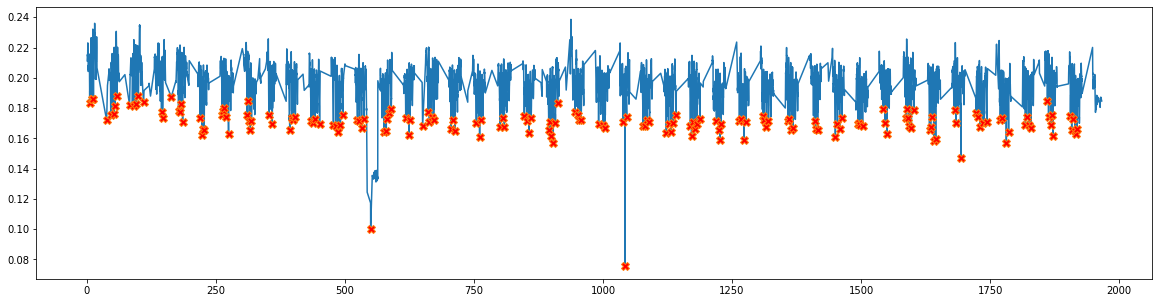

In [44]:
peaks=get_peaks(df_plus,df_plus.l)

[3.6068360805511475, 3.379596710205078, 6.497493743896484, 3.891808032989502, 5.767110824584961, 2.4499404430389404, 4.3997108936309814, 3.8320565223693848, 7.4106597900390625, 4.3530309200286865, 3.7183754444122314, 6.959420680999756, 13.881577491760254, 1.9562387466430664, 4.011314868927002, 5.557451248168945, 1.8747875690460205, 2.010352849960327, 4.046494722366333, 13.081313848495483, 5.5415754318237305, 2.085514545440674, 2.1422746181488037, 11.827144622802734, 2.2624473571777344, 2.2886509895324707, 4.073002099990845, 4.168023109436035, 13.72172498703003, 2.105185031890869, 2.0106115341186523, 1.747760534286499, 2.0172340869903564, 11.237071514129639, 6.749166965484619, 12.12703537940979, 4.406543970108032, 1.6642191410064697, 3.9057867527008057, 7.826397657394409, 3.8627593517303467, 3.9150238037109375, 9.00163197517395, 5.169020891189575, 4.1624436378479, 3.9867610931396484, 4.560534477233887, 4.389984846115112, 6.005687952041626, 3.7874324321746826, 4.28052020072937, 4.0652425

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


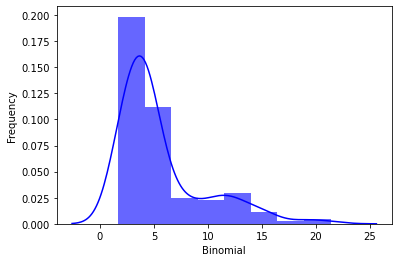

In [45]:
dt_plus_left=time_diff(peaks)
print(dt_plus_left)
distribution(dt_plus_left)

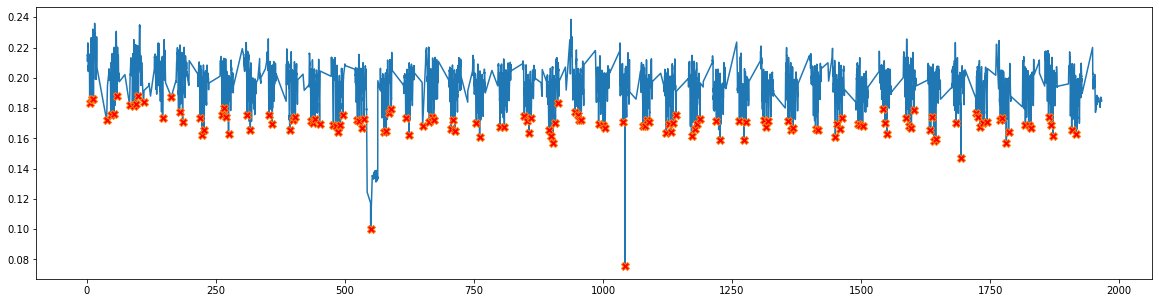

In [46]:
plus_peaks_L=remove_distinc(dt_plus_left,df_plus,Time_to_index_ratio,df_plus.l)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


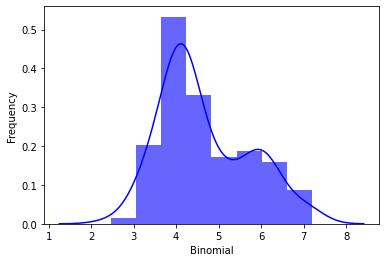

In [47]:
dt_minus_right=time_diff(minus_peaks_R)
dt_minus_right_cleaned=remove_time_gap(dt_minus_right)
distribution(dt_minus_right_cleaned)

# Walking right to Left - minus direction

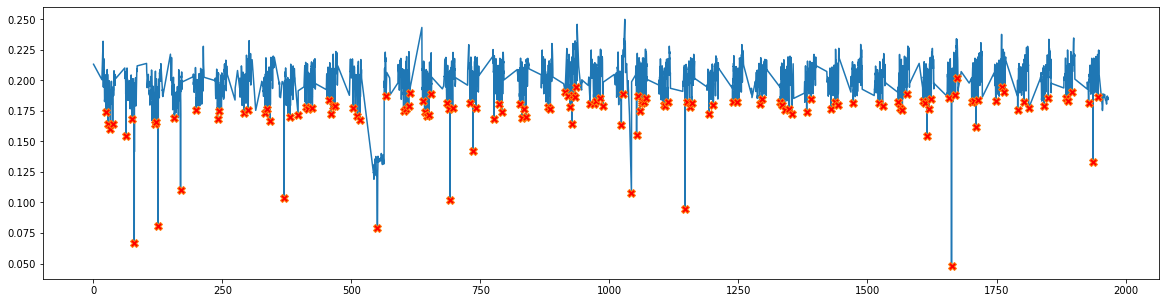

In [48]:
peaks=get_peaks(df_minus,df_minus.l)

[3.811298131942749, 3.6600353717803955, 4.0576722621917725, 5.767153739929199, 12.147266864776611, 4.965900182723999, 15.672327995300293, 2.6454203128814697, 3.8690857887268066, 12.345598220825195, 11.94955039024353, 8.362592220306396, 22.64672040939331, 3.2398881912231445, 23.422377824783325, 8.711434602737427, 9.769938945770264, 2.621854782104492, 5.712527275085449, 8.720380067825317, 11.330188989639282, 6.797727108001709, 3.6624574661254883, 3.2289857864379883, 7.316398859024048, 10.344517230987549, 3.6265132427215576, 3.799099922180176, 3.9932355880737305, 10.00735330581665, 7.99102783203125, 5.002488374710083, 10.540881395339966, 11.238328695297241, 10.037692785263062, 4.023451566696167, 6.230708122253418, 1.6334385871887207, 1.5682003498077393, 3.6179921627044678, 5.081259489059448, 3.685983419418335, 5.48694920539856, 4.620414733886719, 3.6317994594573975, 2.3713650703430176, 5.854806661605835, 7.647679567337036, 5.994233846664429, 6.105628252029419, 7.355110168457031, 12.433459

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


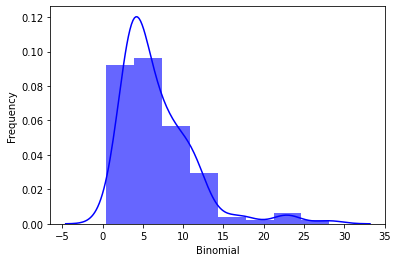

In [49]:

dt_minus_left=time_diff(peaks)
print(dt_minus_left)
distribution(dt_minus_left)

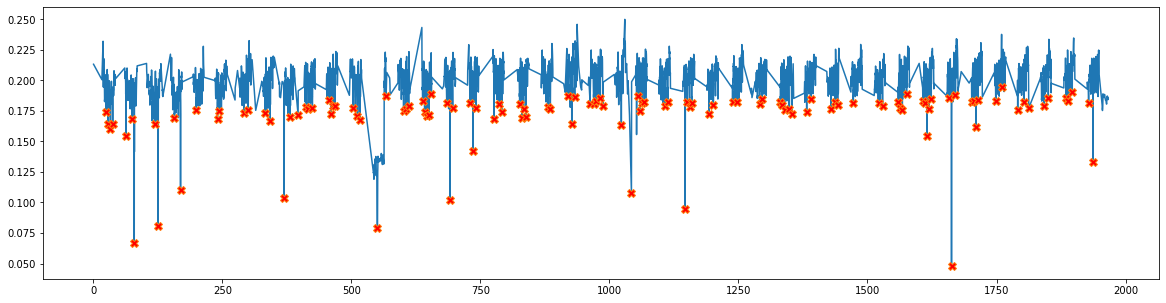

In [50]:
minus_peaks_L=remove_distinc(dt_minus_left,df_minus,Time_to_index_ratio,df_minus.l)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


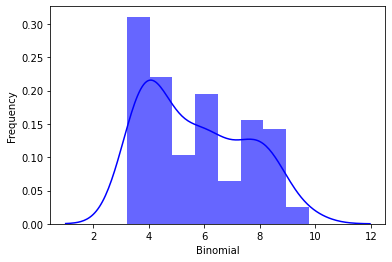

In [51]:
dt_minus_left=time_diff(minus_peaks_L)
dt_minus_left_cleaned=remove_time_gap(dt_minus_left)
distribution(dt_minus_left_cleaned)

# sampling-left leg

In [52]:
sample_strikes_plus_L=sample(df_plus,plus_peaks_L,time_return_points)
sample_strikes_minus_L=sample(df_minus,minus_peaks_L,time_return_points)

In [53]:
strides_plus_L=strides(sample_strikes_plus_L)
strides_minus_L=strides(sample_strikes_minus_L)
print(strides_plus_L)
print('\n')
print(strides_minus_L)

[[], [5.867846965789795, 6.571780204772949], [], [3.864096164703369, 3.53615140914917], [], [], [], [5.98123025894165], [], [4.007466793060303, 4.122321844100952], [], [4.467986822128296, 3.603236675262451, 4.2517006397247314], [], [6.234086036682129], [], [6.5700953006744385], [], [6.5855512619018555, 4.293667316436768], [], [4.03688907623291, 3.915863275527954, 8.842746257781982], [], [4.456792116165161, 4.069600343704224, 4.941490411758423, 4.662103176116943], [], [3.8564202785491943, 4.36315655708313, 4.419243097305298], [], [4.3025126457214355, 4.410900354385376, 5.174618721008301], [], [5.867769718170166], [], [4.137235879898071, 4.154624938964844], [], [3.96309494972229, 4.23746395111084], [], [6.309929132461548], [], [8.688687801361084], [], [4.675804138183594, 4.4532248973846436, 4.118752479553223], [], [4.264689922332764, 4.224888563156128, 4.380394458770752, 4.165017366409302], [], [5.749342918395996, 2.916903257369995, 3.3529584407806396], [], [8.333132982254028, 4.04364347

In [54]:
avg_stride_plus_L=list(map(lambda a : np.mean(a), strides_plus_L[plus::2]))
avg_stride_minus_L=list(map(lambda a : np.mean(a), strides_minus_L[minus::2]))
print(avg_stride_plus_L)
print('\n')
print(avg_stride_minus_L)

[6.219813585281372, 3.7001237869262695, nan, 5.98123025894165, 4.064894318580627, 4.107641379038493, 6.234086036682129, 6.5700953006744385, 5.4396092891693115, 5.598499536514282, 4.532496511936188, 4.212939977645874, 4.629343907038371, 5.867769718170166, 4.1459304094314575, 4.100279450416565, 6.309929132461548, 8.688687801361084, 4.415927171707153, 4.258747577667236, 4.006401538848877, 6.188388228416443, 3.767993450164795, 4.211684862772624, 4.6286739110946655, 5.320619026819865, 6.424297571182251, 6.387336611747742, 4.109198451042175, 4.891087770462036, 4.151493072509766, 4.230125347773234, 4.233305931091309, 3.8944008350372314, 4.91735045115153, 3.982652187347412, 9.56396222114563, 5.162666499614716, 5.350027243296306, 5.3481667041778564, 4.217941880226135, 8.070659637451172]


[4.163626829783122, 8.106979966163635, 6.616905450820923, 11.763152837753296, nan, 3.4284324645996094, 8.070287704467773, 9.787122011184692, 11.589406728744507, 5.799017071723938, 3.8828375339508057, 6.6020767

/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# define feature vector array

In [55]:
TP_side=[]

In [56]:
T_s=[[[None],[None]],[[None],[None]],[[None],[None]],[[None],[None]],[None],[None],[None],[None]]

# stride time 

In [57]:
def comb_dir_arrays(plus_array,minus_array,plus,minus):   
    if plus<minus:
        array=com(plus_array,minus_array)
    elif plus>minus:
        array=com(minus_array,plus_array)
    return array

In [58]:
T3=comb_dir_arrays(avg_stride_plus_R,avg_stride_minus_R,plus,minus)

In [59]:
T4=comb_dir_arrays(avg_stride_plus_L,avg_stride_minus_L,plus,minus)

In [60]:
T_s[1][0]=T3
T_s[1][1]=T4

# step time calculate

In [61]:
def step_time(right,left):
    L_array=[]
    R_array=[]
    try:
        if len(right)==len(left):
            if left[0]>right[0]:
                #print(1)
                Lstep=np.subtract(left,right) 
                L_array=Lstep
                Rstep=np.subtract(right[1:],left[:-1]) 
                R_array=Rstep
            else:
                #print(2)
                Rstep=np.subtract(right,left)
                R_array=Rstep
                Lstep=np.subtract(left[1:],right[:-1]) 
                L_array=Lstep

        elif (len(right)+1)==len(left):#when left strides are max by one
            if right[0]>left[0]:
                #print(3)
                Lstep=np.subtract(left[1:],right) 
                L_array=Lstep
                Rstep=np.subtract(right,left[:-1]) 
                R_array=Rstep

        elif len(right)==(len(left)+1):#when right strides are max by one
            if left[0]>right[0]:
                #print(4)
                Lstep=np.subtract(left,right[:-1]) 
                L_array=Lstep
                Rstep=np.subtract(right[1:],left) 
                R_array=Rstep

        else:
            #print(5)
            L_array.append('ooa')
            R_array.append('ooa')
    except:
        L_array.append('ooa')
        R_array.append('ooa')
        
    return R_array,L_array
                
    

In [62]:
def step_time_array(sample_strikes_R,sample_strikes_L):
    R_st_array=[]
    L_st_array=[]
    for i in range(len(sample_strikes_R)):
        if not len(sample_strikes_R[i])==0:
            Rst,Lst=step_time(sample_strikes_R[i],sample_strikes_L[i])
            R_st_array.append(Rst)
            L_st_array.append(Lst)
    return R_st_array,L_st_array
        

# plus direction

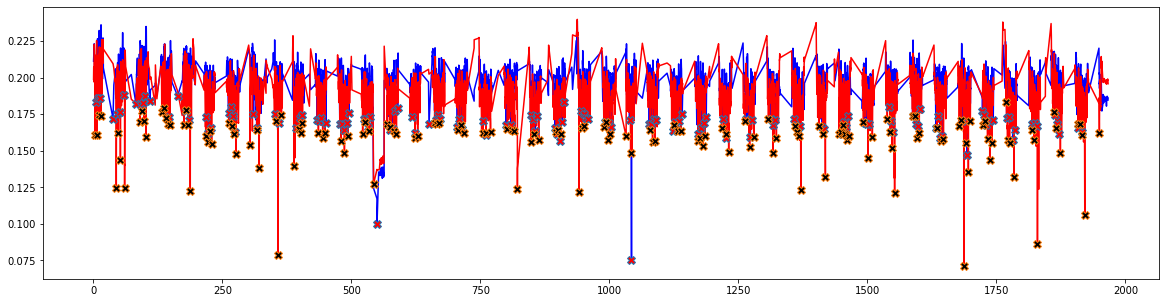

In [63]:
plt.figure(figsize=(20,5))
plt.plot(df_plus.t,df_plus.l,'b')
plt.plot(df_plus.t,df_plus.r,'r')
plt.plot(df_plus.t[plus_peaks_L], df_plus.l[plus_peaks_L],"X",markerfacecolor='red',markersize=8)
plt.plot(df_plus.t[plus_peaks_R], df_plus.r[plus_peaks_R],"X",markerfacecolor='black',markersize=8)
plt.show()

In [64]:
print(sample_strikes_plus_L)
print(sample_strikes_plus_R)

[[38.19837212562561], [46.139007568359375, 52.00685453414917, 58.57863473892212], [82.6324474811554], [92.07784128189087, 95.94193744659424, 99.47808885574341], [109.78297400474548], [146.5103678703308], [163.41620635986328], [179.41567063331604, 185.3969008922577], [], [219.10200309753418, 223.10946989059448, 227.23179173469543], [], [262.0254442691803, 266.4934310913086, 270.09666776657104, 274.3483684062958], [], [310.3441755771637, 316.5782616138458], [], [352.4502694606781, 359.02036476135254], [], [392.94471168518066, 399.5302629470825, 403.8239302635193], [], [433.97631192207336, 438.0132009983063, 441.92906427383423, 450.7718105316162], [], [477.570862531662, 482.02765464782715, 486.0972549915314, 491.0387454032898, 495.70084857940674], [], [524.1803081035614, 528.0367283821106, 532.3998849391937, 536.819128036499], [549.719108581543], [575.7310903072357, 580.0336029529572, 584.4445033073425, 589.6191220283508], [], [617.7210075855255, 623.5887773036957], [650.4246077537537], [

In [65]:
sample_strikes_plus_L = sample_strikes_plus_L[plus::2]
sample_strikes_plus_R = sample_strikes_plus_R[plus::2]

In [66]:
step_plus_R,_=step_time_array(sample_strikes_plus_R,sample_strikes_plus_L)
step_plus_L,_=step_time_array(sample_strikes_plus_L,sample_strikes_plus_R)

In [67]:
print(step_plus_R)
print(step_plus_L)

[array([2.0559411 , 0.49315715, 2.0377214 ]), array([2.09372807, 1.78017569, 2.71059799]), ['ooa'], ['ooa'], array([2.18672252, 2.19306731, 1.97537684]), array([0.23085356, 1.82678628, 2.20050788, 2.20243216]), array([6.45996165, 4.83813286]), [], array([4.89073157, 2.37397146, 1.41516232]), array([2.09553599, 6.40822554, 6.57954264]), ['ooa'], [], array([-1.78639841,  2.6806488 ,  2.81391454]), array([6.08604622, 4.91565919]), array([1.77878022, 1.98285246]), array([2.08553481, 2.19826078, 3.82811737]), [], ['ooa'], array([1.01146746, 2.00585985, 6.50778103]), ['ooa'], [], array([ 1.95937562, -2.14331245, -1.88534212]), array([2.15947199]), array([2.03598595, 2.17122316, 2.48447728]), ['ooa'], array([ 0.11434078, -2.29601288, -1.84423923, -2.4033742 ]), array([6.52175879, 4.8607707 ]), array([7.38107562, 6.53007436]), array([4.70384526, 6.9309001 ]), [], array([1.92402768, 2.59262013]), ['ooa'], array([ 6.97923994, 10.5974834 ]), array([2.20143342, 2.10265374, 2.7558322 ]), array([ 0.

# minus direction

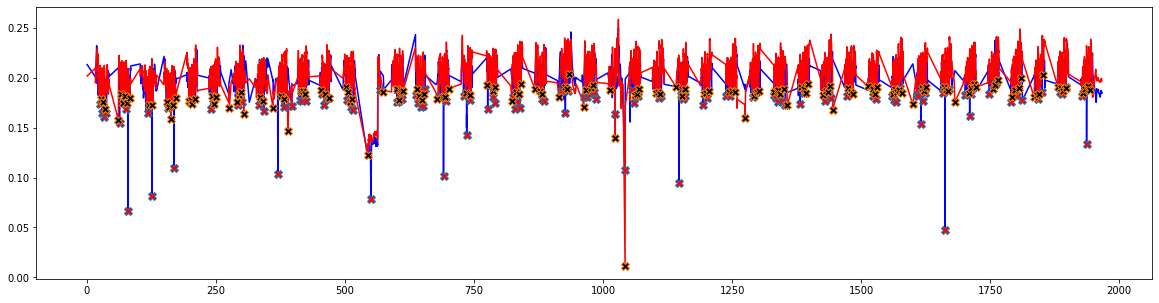

In [68]:
plt.figure(figsize=(20,5))
plt.plot(df_minus.t,df_minus.l,'b')
plt.plot(df_minus.t,df_minus.r,'r')
plt.plot(df_minus.t[minus_peaks_L], df_minus.l[minus_peaks_L],"X",markerfacecolor='red',markersize=8)
plt.plot(df_minus.t[minus_peaks_R], df_minus.r[minus_peaks_R],"X",markerfacecolor='black',markersize=8)
plt.show()

In [69]:
print(sample_strikes_minus_L)
print(sample_strikes_minus_R)

[[24.801718950271606, 28.75893211364746, 33.27637267112732, 37.29259943962097], [], [63.21918797492981, 75.32644581794739, 79.43314790725708], [], [119.05882596969604, 125.67573142051697], [], [157.32429337501526, 169.08744621276855], [], [199.1312141418457], [], [240.73401808738708, 244.1624505519867], [], [292.11229157447815, 300.1825792789459], [], [332.7199056148529, 342.5070276260376], [], [369.8910675048828, 381.4804742336273], [396.88829827308655], [412.9416506290436, 416.69692063331604, 424.53968477249146], [], [456.3435904979706, 460.2347402572632, 464.1453070640564, 467.992103099823], [], [503.1956968307495, 511.7413275241852, 516.3998503684998], [], [550.5966746807098, 567.4489042758942], [], [601.2529399394989, 605.15403008461, 611.0530920028687], [], [638.1702589988708, 642.0497086048126, 646.7171144485474, 650.5208992958069, 655.1177411079407], [], [684.8218924999237, 690.9508066177368, 696.2903492450714], [], [729.8510873317719, 735.8603348731995, 741.9594721794128], [],

In [70]:
sample_strikes_minus_L = sample_strikes_minus_L[minus::2]
sample_strikes_minus_R = sample_strikes_minus_R[minus::2]

In [71]:
print(sample_strikes_minus_L)
print(sample_strikes_minus_R)

[[24.801718950271606, 28.75893211364746, 33.27637267112732, 37.29259943962097], [63.21918797492981, 75.32644581794739, 79.43314790725708], [119.05882596969604, 125.67573142051697], [157.32429337501526, 169.08744621276855], [199.1312141418457], [240.73401808738708, 244.1624505519867], [292.11229157447815, 300.1825792789459], [332.7199056148529, 342.5070276260376], [369.8910675048828, 381.4804742336273], [412.9416506290436, 416.69692063331604, 424.53968477249146], [456.3435904979706, 460.2347402572632, 464.1453070640564, 467.992103099823], [503.1956968307495, 511.7413275241852, 516.3998503684998], [550.5966746807098, 567.4489042758942], [601.2529399394989, 605.15403008461, 611.0530920028687], [638.1702589988708, 642.0497086048126, 646.7171144485474, 650.5208992958069, 655.1177411079407], [684.8218924999237, 690.9508066177368, 696.2903492450714], [729.8510873317719, 735.8603348731995, 741.9594721794128], [776.5237891674042, 786.3905477523804, 791.1748096942902], [826.143129825592, 830.330

In [72]:
step_minus_R,_=step_time_array(sample_strikes_minus_R,sample_strikes_minus_L)
step_minus_L,_=step_time_array(sample_strikes_minus_L,sample_strikes_minus_R)

In [73]:
print(step_minus_R,step_minus_L)

[array([2.09865475, 2.4551785 , 2.22530103]), ['ooa'], array([ 0.62098718, -0.27086139]), ['ooa'], ['ooa'], [], ['ooa'], array([ 2.7153511 , -1.76031494]), array([6.01254177, 0.10925555]), array([ 1.94566989,  1.91984034, -1.70044231]), [], array([ 2.3846159 , -1.7716167 , -2.56812692]), [], array([3.69006777, 3.72714591, 1.87392449]), array([1.84791923, 2.02136135, 2.00334072, 1.91510725]), array([5.7873354 , 3.77666497, 5.5354743 ]), array([3.74010992, 6.20644784]), array([9.65220475, 3.93882442]), array([5.93324661, 6.20006371, 7.16979122]), array([0.11377907]), array([6.21657181, 3.86232519, 1.92745042]), [], array([-0.21372366]), array([5.90998673, 6.46326685, 6.72329855]), array([-2.02452588, -1.60410452]), [], [], [], [], array([0.32524323, 3.74744368, 4.09165359, 2.49731565]), ['ooa'], ['ooa'], ['ooa'], ['ooa'], [], ['ooa'], array([ 2.2219615 ,  1.62760353, -1.83463073]), array([7.05844498, 6.32233238, 7.53865123, 8.79567051]), [], [], ['ooa'], array([2.42492247, 2.74611759, 0.

In [74]:
avg_step_plus_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_plus_L))
avg_step_minus_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_minus_L))
avg_step_plus_R=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_plus_R))
avg_step_minus_R=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_minus_R))

/tmp/ipykernel_5805/3252339705.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  avg_step_plus_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_plus_L))
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_5805/3252339705.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  avg_step_minus_L=list(map(lambda a : np.mean(a) if a!=['ooa'] else ['ooa'], step_minus_L))
/tmp/ipykernel_5805/3252339705.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform ele

In [75]:
T1=comb_dir_arrays(avg_step_plus_R,avg_step_minus_R,plus,minus)
T2=comb_dir_arrays(avg_step_plus_L,avg_step_minus_L,plus,minus)

In [76]:
T_s[0][0]=T1
T_s[0][1]=T2

# find heel strike and toe-off time-Right

# plus direction-Right

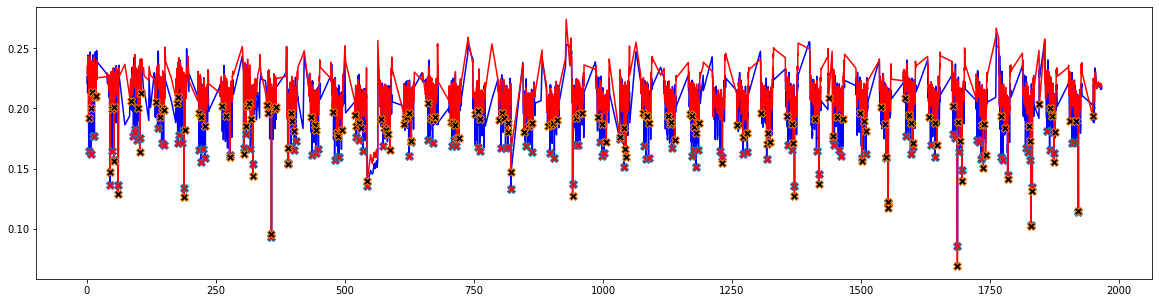

In [77]:
h_valley_plus_R, _ = find_peaks(-df_plus.h_R,prominence=0.05)
f_valley_plus_R, _ = find_peaks(-df_plus.f_R,prominence=0.025)
plt.figure(figsize=(20,5))
plt.plot(df_plus.t,df_plus.h_R,'b')
plt.plot(df_plus.t,df_plus.f_R,'r')
plt.plot(df_plus.t[h_valley_plus_R], df_plus.h_R[h_valley_plus_R],"X",markerfacecolor='red',markersize=8)
plt.plot(df_plus.t[f_valley_plus_R], df_plus.f_R[f_valley_plus_R],"X",markerfacecolor='black',markersize=8)
plt.show()

# outlier remove-plus-Right

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


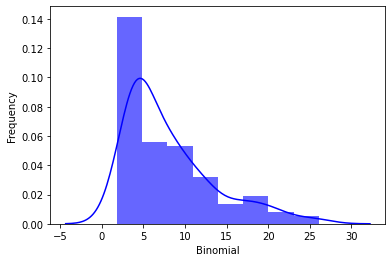

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


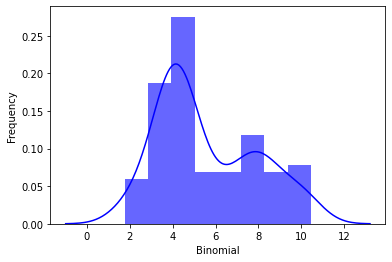

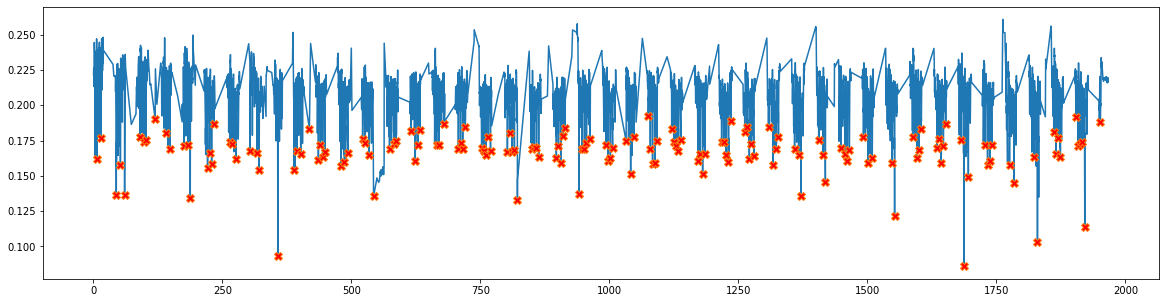

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


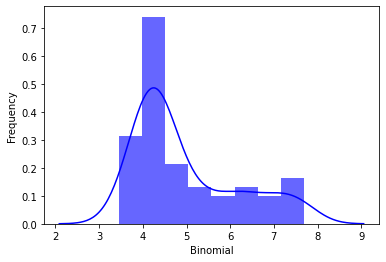

In [78]:
#toe off
dt_plus_to_r=time_diff(h_valley_plus_R)
distribution(dt_plus_to_r)
dt_plus_to_r_new=remove_time_gap(dt_plus_to_r)
distribution(dt_plus_to_r_new)
plus_peaks_to_r=remove_distinc(dt_plus_to_r,df_plus,Time_to_index_ratio,df_plus.h_R)
dt_plus_to_r=time_diff(plus_peaks_to_r)
dt_plus_to_r_cleaned=remove_time_gap(dt_plus_to_r)
distribution(dt_plus_to_r_cleaned)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


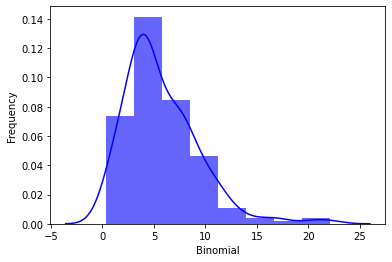

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


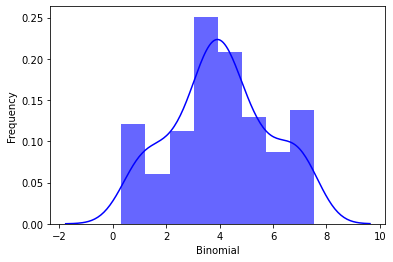

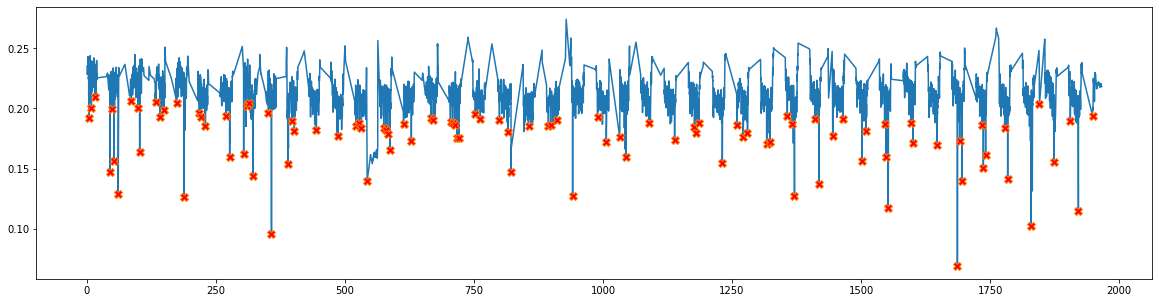

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


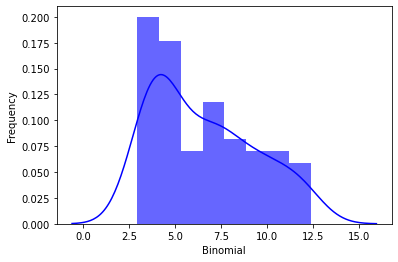

In [79]:
#heel strike
dt_plus_hs_r=time_diff(f_valley_plus_R)
distribution(dt_plus_hs_r)
dt_plus_hs_r_new=remove_time_gap(dt_plus_hs_r)
distribution(dt_plus_hs_r_new)
plus_peaks_hs_r=remove_distinc(dt_plus_hs_r,df_plus,Time_to_index_ratio,df_plus.f_R)
dt_plus_hs_r=time_diff(plus_peaks_hs_r)
dt_plus_hs_r_cleaned=remove_time_gap(dt_plus_hs_r)
distribution(dt_plus_hs_r_cleaned)

# minus direction-Right

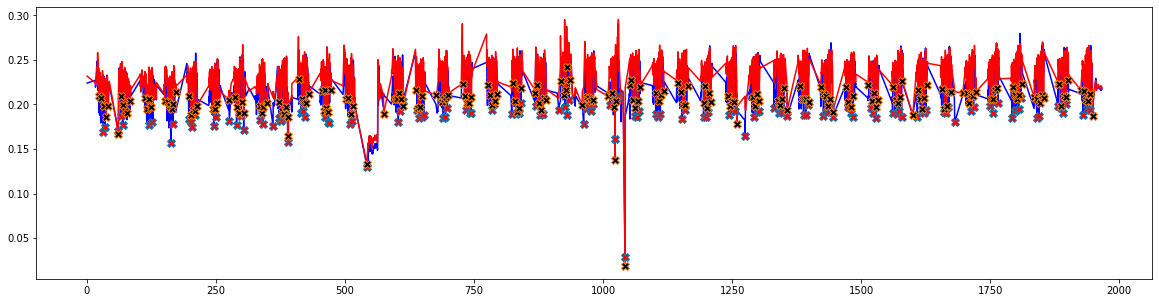

In [80]:
h_valley_minus_R, _ = find_peaks(-df_minus.h_R,prominence=0.05)
f_valley_minus_R, _ = find_peaks(-df_minus.f_R,prominence=0.025)
plt.figure(figsize=(20,5))
plt.plot(df_minus.t,df_minus.h_R,'b')
plt.plot(df_minus.t,df_minus.f_R,'r')
plt.plot(df_minus.t[h_valley_minus_R], df_minus.h_R[h_valley_minus_R],"X",markerfacecolor='red',markersize=8)
plt.plot(df_minus.t[f_valley_minus_R], df_minus.f_R[f_valley_minus_R],"X",markerfacecolor='black',markersize=8)
plt.show()

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


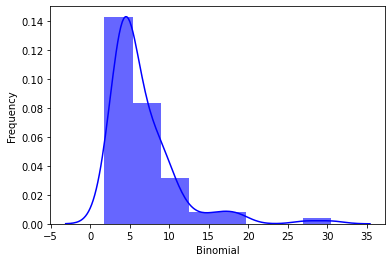

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


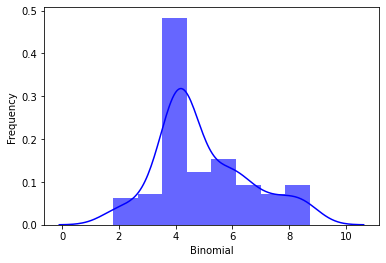

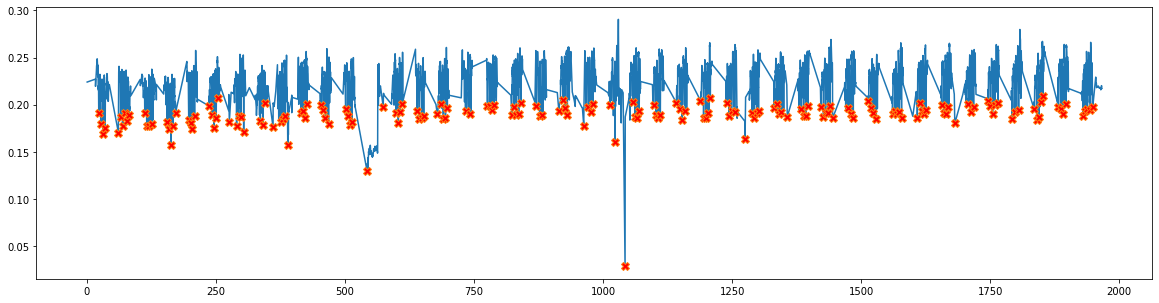

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


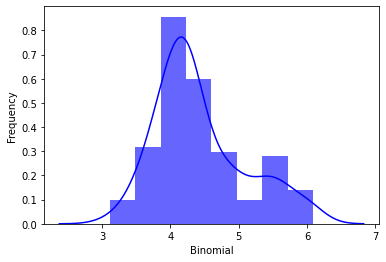

In [81]:
#toe off
dt_minus_to_r=time_diff(h_valley_minus_R)
distribution(dt_minus_to_r)
dt_minus_to_r_new=remove_time_gap(dt_minus_to_r)
distribution(dt_minus_to_r_new)
minus_peaks_to_r=remove_distinc(dt_minus_to_r,df_minus,Time_to_index_ratio,df_minus.h_R)
dt_minus_to_r=time_diff(minus_peaks_to_r)
dt_minus_to_r_cleaned=remove_time_gap(dt_minus_to_r)
distribution(dt_minus_to_r_cleaned)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


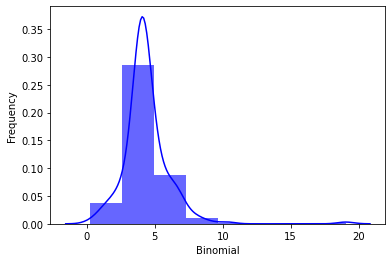

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


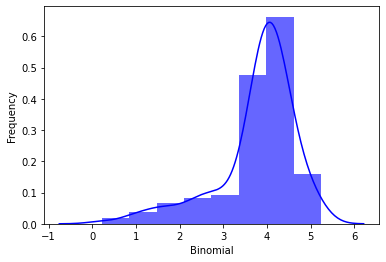

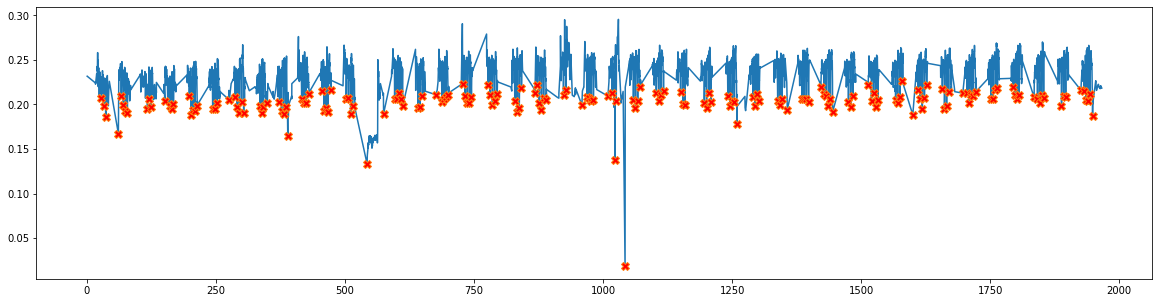

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


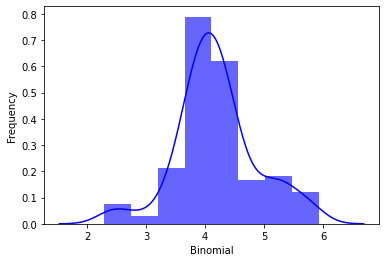

In [82]:
#heel strike
dt_minus_hs_r=time_diff(f_valley_minus_R)
distribution(dt_minus_hs_r)
dt_minus_hs_r_new=remove_time_gap(dt_minus_hs_r)
distribution(dt_minus_hs_r_new)
minus_peaks_hs_r=remove_distinc(dt_minus_hs_r,df_minus,Time_to_index_ratio,df_minus.f_R)
dt_minus_hs_r=time_diff(minus_peaks_hs_r)
dt_minus_hs_r_cleaned=remove_time_gap(dt_minus_hs_r)
distribution(dt_minus_hs_r_cleaned)

# sampling-Right

In [83]:
sample_strikes_plus_hs_R=sample(df_plus,plus_peaks_hs_r,time_return_points)
sample_strikes_minus_hs_R=sample(df_minus,minus_peaks_hs_r,time_return_points)
sample_strikes_plus_to_R=sample(df_plus,plus_peaks_to_r,time_return_points)
sample_strikes_minus_to_R=sample(df_minus,minus_peaks_to_r,time_return_points)


# find heel strike and toe-off time-left

# Plus direction-left

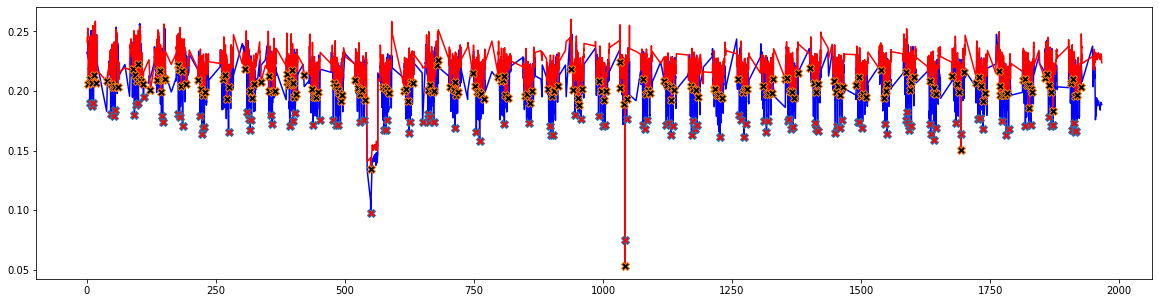

In [84]:
h_valley_plus_L, _ = find_peaks(-df_plus.h_L,prominence=0.05)
f_valley_plus_L, _ = find_peaks(-df_plus.f_L,prominence=0.02)
plt.figure(figsize=(20,5))
plt.plot(df_plus.t,df_plus.h_L,'b')
plt.plot(df_plus.t,df_plus.f_L,'r')
plt.plot(df_plus.t[h_valley_plus_L], df_plus.h_L[h_valley_plus_L],"X",markerfacecolor='red',markersize=8)
plt.plot(df_plus.t[f_valley_plus_L], df_plus.f_L[f_valley_plus_L],"X",markerfacecolor='black',markersize=8)
plt.show()

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


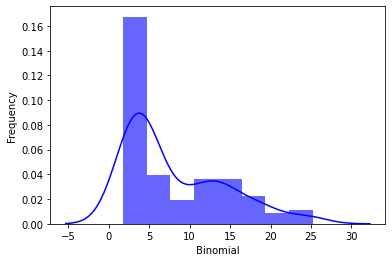

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


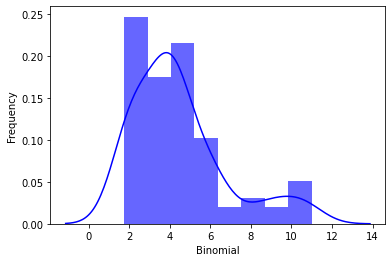

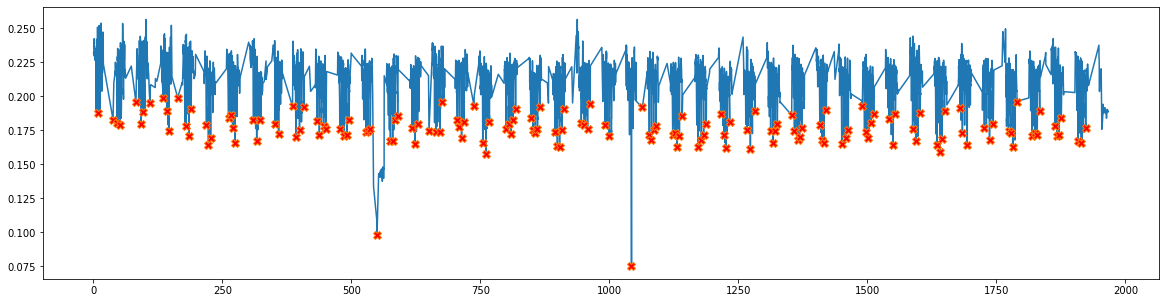

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


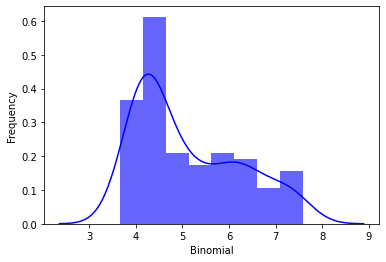

In [85]:
#toe off
dt_plus_to_l=time_diff(h_valley_plus_L)
distribution(dt_plus_to_l)
dt_plus_to_l_new=remove_time_gap(dt_plus_to_l)
distribution(dt_plus_to_l_new)
plus_peaks_to_l=remove_distinc(dt_plus_to_l,df_plus,Time_to_index_ratio,df_plus.h_L)
dt_plus_to_l=time_diff(plus_peaks_to_l)
dt_plus_to_l_cleaned=remove_time_gap(dt_plus_to_l)
distribution(dt_plus_to_l_cleaned)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


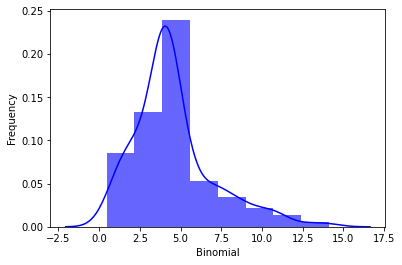

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


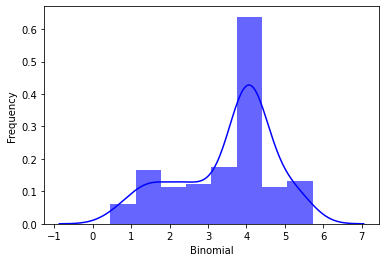

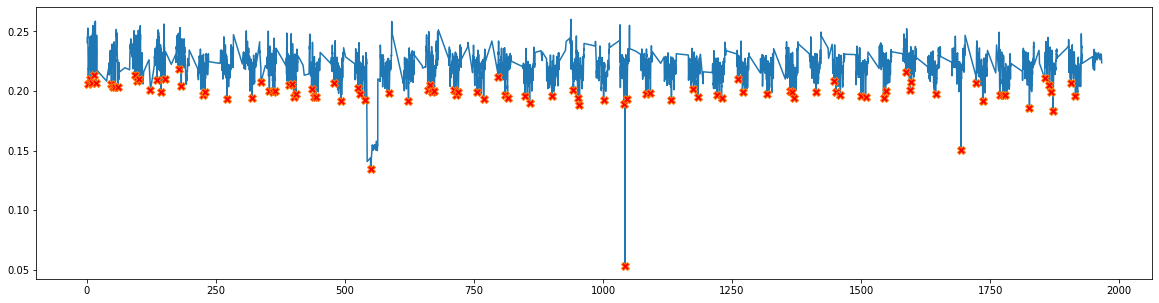

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


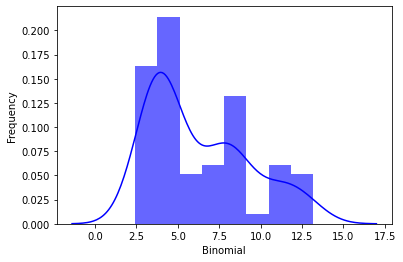

In [86]:
#heel strike
dt_plus_hs_l=time_diff(f_valley_plus_L)
distribution(dt_plus_hs_l)
dt_plus_hs_l_new=remove_time_gap(dt_plus_hs_l)
distribution(dt_plus_hs_l_new)
plus_peaks_hs_l=remove_distinc(dt_plus_hs_l,df_plus,Time_to_index_ratio,df_plus.f_L)
dt_plus_hs_l=time_diff(plus_peaks_hs_l)
dt_plus_hs_l_cleaned=remove_time_gap(dt_plus_hs_l)
distribution(dt_plus_hs_l_cleaned)

# minus-direction-left

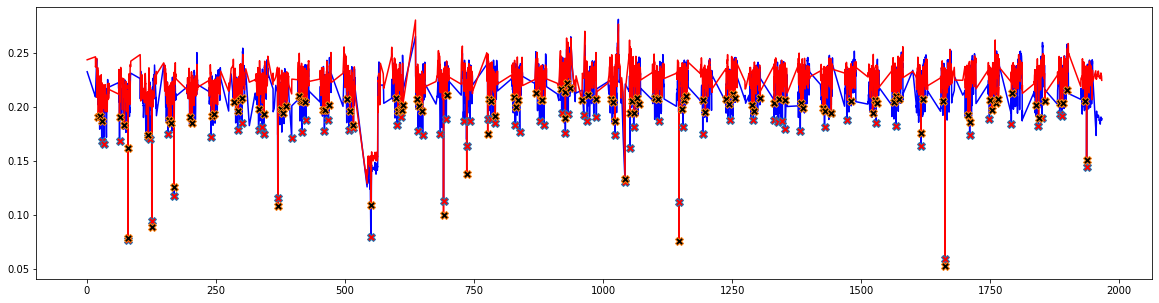

In [87]:
h_valley_minus_L, _ = find_peaks(-df_minus.h_L,prominence=0.05)
f_valley_minus_L, _ = find_peaks(-df_minus.f_L,prominence=0.03)
plt.figure(figsize=(20,5))
plt.plot(df_minus.t,df_minus.h_L,'b')
plt.plot(df_minus.t,df_minus.f_L,'r')
plt.plot(df_minus.t[h_valley_minus_L], df_minus.h_L[h_valley_minus_L],"X",markerfacecolor='red',markersize=8)
plt.plot(df_minus.t[f_valley_minus_L], df_minus.f_L[f_valley_minus_L],"X",markerfacecolor='black',markersize=8)
plt.show()

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


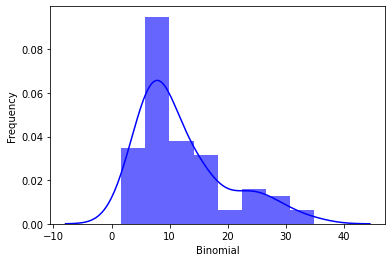

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


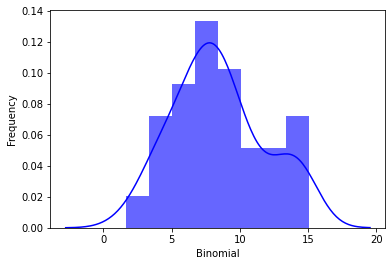

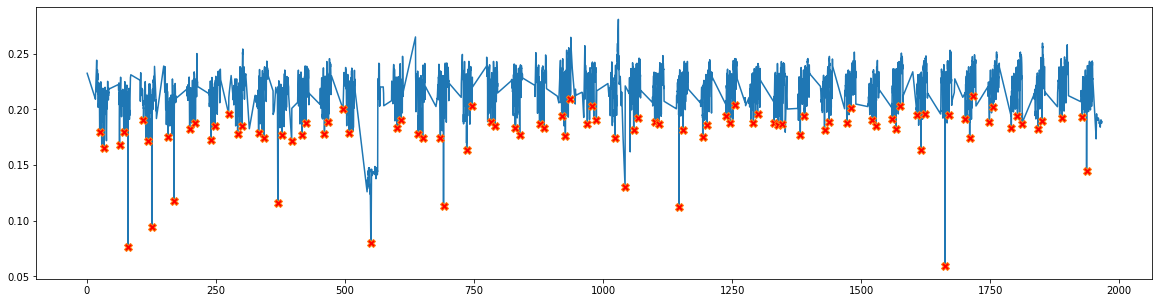

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


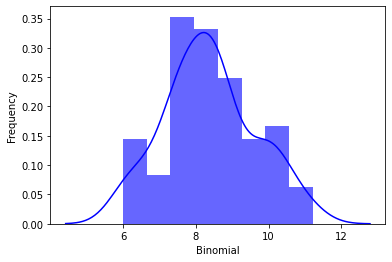

In [88]:
#toe off
dt_minus_to_l=time_diff(h_valley_minus_L)
distribution(dt_minus_to_l)
dt_minus_to_l_new=remove_time_gap(dt_minus_to_l)
distribution(dt_minus_to_l_new)
minus_peaks_to_l=remove_distinc(dt_minus_to_l,df_minus,Time_to_index_ratio,df_minus.h_L)
dt_minus_to_l=time_diff(minus_peaks_to_l)
dt_minus_to_l_cleaned=remove_time_gap(dt_minus_to_l)
distribution(dt_minus_to_l_cleaned)

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


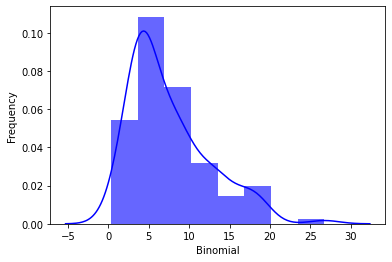

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


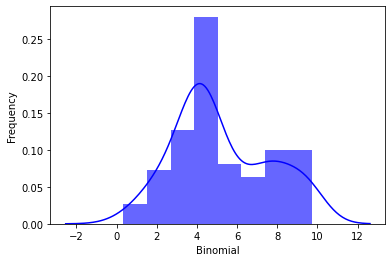

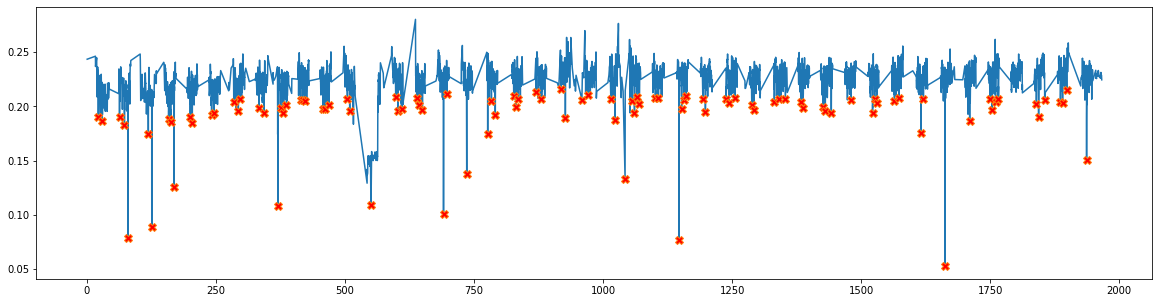

/home/jayasanka/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


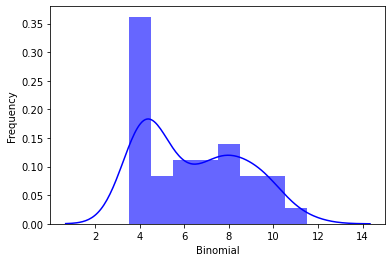

In [89]:
#heel strike
dt_minus_hs_l=time_diff(f_valley_minus_L)
distribution(dt_minus_hs_l)
dt_minus_hs_l_new=remove_time_gap(dt_minus_hs_l)
distribution(dt_minus_hs_l_new)
minus_peaks_hs_l=remove_distinc(dt_minus_hs_l,df_minus,Time_to_index_ratio,df_minus.f_L)
dt_minus_hs_l=time_diff(minus_peaks_hs_l)
dt_minus_hs_l_cleaned=remove_time_gap(dt_minus_hs_l)
distribution(dt_minus_hs_l_cleaned)

# sampling-left

In [90]:
sample_strikes_plus_hs_L=sample(df_plus,plus_peaks_hs_l,time_return_points)
sample_strikes_minus_hs_L=sample(df_minus,minus_peaks_hs_l,time_return_points)
sample_strikes_plus_to_L=sample(df_plus,plus_peaks_to_l,time_return_points)
sample_strikes_minus_to_L=sample(df_minus,minus_peaks_to_l,time_return_points)
sample_strikes_plus_hs_L=sample_strikes_plus_hs_L[plus::2]
sample_strikes_plus_to_L=sample_strikes_plus_to_L[plus::2]
sample_strikes_minus_hs_L=sample_strikes_minus_hs_L[minus::2]
sample_strikes_minus_to_L=sample_strikes_minus_to_L[minus::2]

In [91]:
def time_diff_array(first,second):
    second_array=[]
    first_array=[]
    try:
        if len(first)==len(second):
            if second[0]>first[0]:
                #print(1)
                Lstep=np.subtract(second,first) 
                second_array=Lstep
                Rstep=np.subtract(first[1:],second[:-1]) 
                first_array=Rstep
            else:
                #print(2)
                Rstep=np.subtract(first,second)
                first_array=Rstep
                Lstep=np.subtract(second[1:],first[:-1]) 
                second_array=Lstep

        elif (len(first)+1)==len(second):#when left strides are max by one
            if first[0]>second[0]:
                #print(3)
                Lstep=np.subtract(second[1:],first) 
                second_array=Lstep
                Rstep=np.subtract(first,second[:-1]) 
                first_array=Rstep

        elif len(first)==(len(second)+1):#when right strides are max by one
            if second[0]>first[0]:
                #print(4)
                Lstep=np.subtract(second,first[:-1]) 
                second_array=Lstep
                Rstep=np.subtract(first[1:],second) 
                first_array=Rstep

        else:
            #print(5)
            second_array.append('ooa')
            first_array.append('ooa')
            
    except:
            second_array.append('ooa')
            first_array.append('ooa')
        


    return first_array,second_array
                
    

In [92]:
time_diff_array([2,5,8],[3,7,10])

(array([2, 1]), array([1, 2, 2]))

# Calculate swing time

In [93]:
def swing_array(sample_strikes_hs,sample_strikes_to):
    swing_array=[]
    for i in range(len(sample_strikes_hs)):
        if not len(sample_strikes_hs[i])==0:
            #print(len(sample_strikes_plus_R[i]),len(sample_strikes_plus_L[i]))
            hs_to,_=time_diff_array(sample_strikes_hs[i],sample_strikes_to[i])
            swing_array.append(hs_to)
    return swing_array
        

In [94]:
swing_array_plus_R=swing_array(sample_strikes_plus_hs_R,sample_strikes_plus_to_R)
print(swing_array_plus_R)

[[], array([8.77729154, 4.46657372]), array([1.14045572, 0.84909081]), [], [], array([5.13753486, 8.23058319]), array([0.]), array([-2.98651052,  0.10978484]), array([0.]), array([0.        , 2.76653409, 0.        ]), ['ooa'], ['ooa'], array([ 0.        ,  1.61152911, -2.85349917]), array([0.]), [], ['ooa'], array([1.34391236, 1.51377916]), array([1.09199476, 1.38416648, 1.67898107, 0.5125742 ]), ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], [], ['ooa'], ['ooa'], array([5.54535341, 4.91664577, 4.80398083]), ['ooa'], ['ooa'], ['ooa'], ['ooa'], array([7.36554193, 4.3097837 ]), array([5.61762071, 4.82008553]), ['ooa'], array([9.06199527, 8.47150326]), array([0.35260296, 0.        ]), ['ooa'], ['ooa'], array([4.99128485, 4.36319113, 0.        ]), array([5.49046397, 4.16680002, 4.37862182]), array([3.48333883, 0.        ]), array([6.7164619]), ['ooa'], ['ooa'], ['ooa'], ['ooa']]


In [95]:
swing_array_plus_L=swing_array(sample_strikes_plus_hs_L,sample_strikes_plus_to_L)
print(swing_array_plus_L)

[['ooa'], [], array([1.00246382, 1.36022615, 4.06172705]), [], array([5.13906145, 5.34423566]), ['ooa'], ['ooa'], [], array([ 4.89073157,  1.36205602, -3.24559355]), array([ 1.31475043,  1.21318841, -2.9209311 ]), ['ooa'], array([1.41687536, 5.78491187]), ['ooa'], ['ooa'], array([ 1.23013639, -2.9740324 , -3.81570864]), array([5.56274796, 5.26971459, 6.00164008]), array([1.35647726, 7.75458622]), ['ooa'], ['ooa'], ['ooa'], [], array([9.68640542]), ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], [], ['ooa'], ['ooa'], ['ooa'], array([1.19560981, 1.3827343 ]), ['ooa'], array([ 1.44549251, -2.42273784]), array([7.42547417, 3.89506102]), ['ooa'], ['ooa'], [], [], ['ooa'], array([1.37789154, 1.35474038, 0.39766741]), []]


In [96]:
swing_array_minus_R=swing_array(sample_strikes_minus_hs_R,sample_strikes_minus_to_R)
swing_array_minus_L=swing_array(sample_strikes_minus_hs_L,sample_strikes_minus_to_L)

In [97]:
def avrg(x):
    array=[]
    for i in x:
        if i==['ooa']:
            array.append(['ooa'])
        elif len(i)==0:
            array.append([])
        else:
            s=0
            for j in i:
                s+=j
            m=s/len(i)
            array.append(m)    
    return array

In [98]:
avg_swing_plus_R=avrg(swing_array_plus_R)
avg_swing_plus_L=avrg(swing_array_plus_L)
avg_swing_minus_R=avrg(swing_array_minus_R)
avg_swing_minus_L=avrg(swing_array_minus_L)

/tmp/ipykernel_5805/2757863319.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if i==['ooa']:


In [99]:
T7=comb_dir_arrays(avg_swing_plus_R,avg_swing_minus_R,plus,minus)
T8=comb_dir_arrays(avg_swing_plus_L,avg_swing_minus_L,plus,minus)

In [100]:
T_s[3][0]=T7
T_s[3][1]=T8

In [101]:

#output = open('side.pkl', 'wb')
#pickle.dump(T_s, output)
#output.close()

# calculate double support time

In [102]:
def double_support_time(to_R,hs_R,to_L,hs_L):
    array=[]
    if to_R==hs_L==hs_R==hs_L:
        if to_R[0]>hs_L[i][0]:
            dst1=np.subtract(to_R,hs_L)
            dst2=np.subtract(to_L[1:],hs_R)
            dst=np.add(dst1,dst2)
            array.append(dst)
        elif to_L[i][0]>hs_R[i][0]:
            dst1=np.subtract(to_R[1:],hs_L)
            dst2=np.subtract(to_L,hs_R)
            dst=np.add(dst1,dst2)
            array.append(dst)
        else:
            dst_array.append("ooa")
        return array
    else:
        return "ooa"   

In [103]:
def double_support_time_array(sample_strikes_to_R,sample_strikes_hs_R,sample_strikes_to_L,sample_strikes_hs_L):
    dst_array=[]
    for i in range(min(len(sample_strikes_to_R),len(sample_strikes_to_L))):
        if not len(sample_strikes_to_R[i])==0:
            array=double_support_time(sample_strikes_to_R[i],sample_strikes_hs_R[i],sample_strikes_to_L[i],sample_strikes_hs_L[i])
            dst_array.append(array)
    return dst_array
        

In [104]:
double_support_time(sample_strikes_plus_to_R,sample_strikes_plus_hs_R,sample_strikes_plus_to_L,sample_strikes_plus_hs_L)

'ooa'

# calculate stance time ratio

In [105]:

T_plus=np.add(avg_stride_plus_L,avg_stride_plus_R)/2
T_minus=np.add(avg_stride_minus_L,avg_stride_minus_R)/2

In [106]:
def stance_time_ratio_array(sample_strikes_to_R,sample_strikes_hs_R,sample_strikes_to_L,sample_strikes_hs_L,T):
    str_array=[]
    for i in range(min(len(sample_strikes_to_R),len(sample_strikes_to_L))):
        if not (len(sample_strikes_to_R[i])==0 or len(sample_strikes_to_L[i])==0 or len(sample_strikes_hs_R[i])==0 or len(sample_strikes_hs_L[i])==0):
            left,_=time_diff_array(sample_strikes_to_L[i][1:],sample_strikes_hs_L[i][:-1])
            right,_=time_diff_array(sample_strikes_to_R[i][1:],sample_strikes_hs_R[i][:-1])
            if left==['ooa'] or right==['ooa']:
                str_array.append(['ooa'])
            else:
                if len(left)>len(right):
                    right=np.concatenate((right, [np.mean(right)]*abs(len(left)-len(right))), axis=0)
                elif len(left)<len(right):
                    left=np.concatenate((left, [np.mean(left)]*abs(len(left)-len(right))), axis=0)
                array=np.add(left,right)
                print(array)
                array=array/T[i]
                str_array.append(array)

    return str_array

In [107]:
STR_plus=stance_time_ratio_array(sample_strikes_plus_to_R,sample_strikes_plus_hs_R,sample_strikes_plus_to_L,sample_strikes_plus_hs_L,T_plus)
STR_minus=stance_time_ratio_array(sample_strikes_minus_to_R,sample_strikes_minus_hs_R,sample_strikes_minus_to_L,sample_strikes_minus_hs_L,T_minus)
print(STR_plus)
print(STR_minus)

[10.61996698 15.06121111]
[nan nan]
[nan]
[]
[14.03627014 14.34146523]
[18.03553081 18.66693187 18.80627096]
[14.0863874  13.78078413]
[nan]
[12.47556925 14.40485501]
[16.64505744 17.40984988]
[nan]
[nan nan nan]
[14.50365114 14.20086551 13.85755062]
[nan]
[9.83786583 9.66578245 9.59832978]
[nan nan nan]
[nan]
[array([2.75397321, 3.90567805]), array([nan, nan]), ['ooa'], array([nan]), array([], dtype=float64), array([2.64195218, 2.69939699]), ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], array([4.37793022, 4.53119601, 4.56501907]), ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa']]
[array([3.32843258, 3.25622245]), ['ooa'], array([nan]), array([2.02165084, 2.33428925]), ['ooa'], ['ooa'], ['ooa'], ['ooa'], ['ooa'], array([2.20485101, 2.30615756]), ['ooa'], ['ooa'], array([nan]), array([nan, nan, nan]), ['ooa'], ['ooa'], ['ooa'], array([3.25669634, 3.18870789, 3.11161886]), array([nan]), ['ooa'], array([1.7346869 , 1.70434386, 1.6924501 ]), 

/tmp/ipykernel_5805/3520770124.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if left==['ooa'] or right==['ooa']:
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jayasanka/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# calculate swing time ratio

In [108]:
def swing_time_ratio_array(sample_strikes_to_R,sample_strikes_hs_R,sample_strikes_to_L,sample_strikes_hs_L,T):
    swr_array=[]
    for i in range(min(len(sample_strikes_to_R),len(sample_strikes_to_L))):
        if not len(sample_strikes_to_R[i])==0:
            left,_=time_diff_array(sample_strikes_hs_L[i],sample_strikes_to_L[i])
            right,_=time_diff_array(sample_strikes_hs_R[i],sample_strikes_to_R[i])
            if left==['ooa'] or right==['ooa']:
                swr_array.append(['ooa'])
            else:
                if len(left)>len(right):
                    right=np.concatenate((right, [np.mean(right)]*abs(len(left)-len(right))), axis=0)
                elif len(left)<len(right):
                    left=np.concatenate((left, [np.mean(left)]*abs(len(left)-len(right))), axis=0)
                array=np.add(left,right)
                array=array/T[i]
                swr_array.append(array)
            
    return swr_array

In [109]:
swing_time_ratio_array(sample_strikes_plus_to_R,sample_strikes_plus_hs_R,sample_strikes_plus_to_L,sample_strikes_plus_hs_L,T_plus)
swing_time_ratio_array(sample_strikes_plus_to_R,sample_strikes_plus_hs_R,sample_strikes_plus_to_L,sample_strikes_plus_hs_L,T_minus)

/tmp/ipykernel_5805/769455618.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if left==['ooa'] or right==['ooa']:


[array([], dtype=float64),
 array([nan, nan]),
 ['ooa'],
 ['ooa'],
 array([], dtype=float64),
 array([nan, nan, nan]),
 array([1.47747044, 3.15932005]),
 ['ooa'],
 ['ooa'],
 array([0.9395647 , 0.89007049, 1.01369489]),
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 array([0.50433032, 0.60999702, 0.65436555, 0.39721693]),
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa'],
 ['ooa']]

# .....................................................................................

In [110]:
output = open('para_values/{}.pkl'.format(name), 'wb')
pickle.dump(T_s, output)
output.close()

In [2365]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

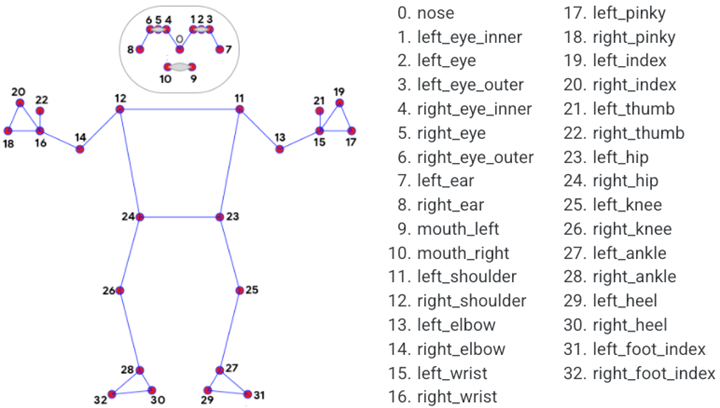